In [1]:
import numpy as np 
import pandas as pd 
import plotly.express as px 
import missingno as msno #
import os
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style

# Import Data

In [4]:
draft = pd.read_csv("nbaplayersdraft.csv")
player = pd.read_csv("all_seasons.csv")
ft= pd.read_csv("all_seasons.csv")

In [5]:
draft.describe()

,id,year,rank,overall_pick,years_active,games,minutes_played,points,total_rebounds,assists,...,3_point_percentage,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement
count,1922.000000,1922.000000,1922.000000,1922.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,...,1545.000000,1633.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1668.000000,1668.000000,1669.000000
mean,961.500000,2005.317378,29.694589,29.694589,6.332534,348.042540,8399.055722,3580.413421,1497.009587,774.300779,...,0.272405,0.716825,18.134032,7.275734,3.194368,1.550749,17.873697,0.061691,-2.311271,4.403176
std,554.977927,9.456946,16.912454,16.912454,4.656321,324.897567,9845.871529,4826.142847,2003.686388,1284.602969,...,0.128339,0.118702,8.707656,4.969343,2.083895,1.488536,27.989805,0.094467,4.143403,11.461729
min,1.000000,1989.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.700000,-1.264000,-52.000000,-8.500000
25%,481.250000,1997.000000,15.000000,15.000000,2.000000,72.000000,838.000000,265.000000,128.000000,46.000000,...,0.222000,0.659000,11.000000,3.400000,1.700000,0.500000,0.400000,0.030000,-3.900000,-0.400000
50%,961.500000,2005.000000,30.000000,30.000000,5.000000,235.000000,4204.000000,1552.000000,656.000000,257.000000,...,0.317000,0.736000,17.700000,6.200000,2.800000,1.100000,5.300000,0.069000,-2.000000,0.000000
75%,1441.750000,2013.000000,44.000000,44.000000,10.000000,584.000000,13246.000000,5150.000000,2139.000000,910.000000,...,0.356000,0.797000,24.800000,10.000000,4.200000,2.100000,24.500000,0.104000,-0.300000,4.500000
max,1922.000000,2021.000000,60.000000,60.000000,22.000000,1541.000000,52139.000000,37062.000000,15091.000000,12091.000000,...,1.000000,1.000000,41.100000,27.200000,13.300000,9.500000,249.500000,1.442000,51.100000,142.600000


# Rank colleges by player's total minutes in NBA

In [7]:
df1=draft.groupby(["college"]).sum().sort_values(by=["minutes_played"],ascending=False)
df2=df1[["games","minutes_played","points","total_rebounds","assists"]]
df2=df2.reset_index()

In [8]:
df2=df2.reset_index()
df3=df2[["index","college","minutes_played"]]
df3.columns=["college_rank","college","minutes_played"]
df4=df3.merge(draft,left_on="college",right_on="college",suffixes=('_left', '_right'))

In [9]:
df3.head(30)

,college_rank,college,minutes_played
0,0,Kentucky,538292.0
1,1,Duke,535270.0
2,2,UNC,504352.0
3,3,Arizona,419753.0
4,4,UCLA,397511.0
5,5,UConn,366593.0
6,6,Kansas,339051.0
7,7,Michigan,299274.0
8,8,Georgia Tech,280831.0
9,9,Texas,244750.0


# NBA Draft Analysis (By College)

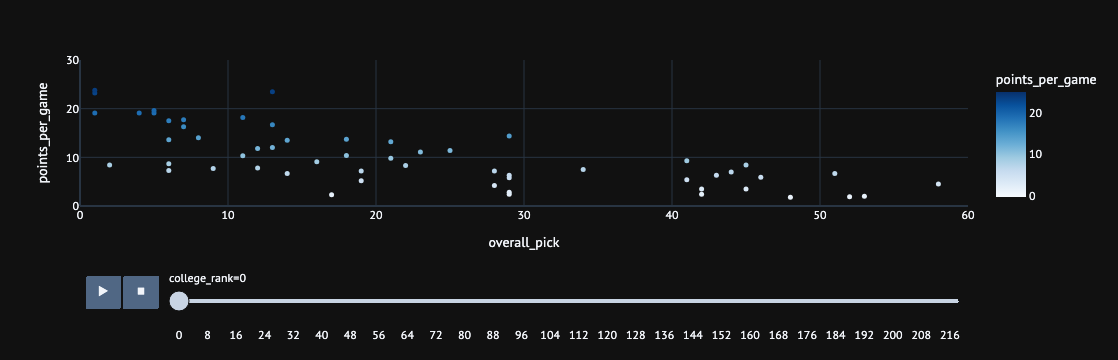

In [11]:
df0 = df4[df4["games"] > 0]

sorted_df = df0.sort_values(by = "college_rank", ascending = True)

fig = px.scatter(sorted_df, x = "overall_pick", y = "points_per_game",
                    range_x = (0, 60), range_y = (0, 30),
                    hover_data = ["college"],
                    hover_name="player",
                    animation_frame = "college_rank", range_color = (0, 25),
                    color = "points_per_game", color_continuous_scale = "Blues")
                    #title = "Points Per Game Overall Pick 1-60 Animation by Year and Games")

fig.update_traces(marker = dict(size = 5)) # scaling down the markers
fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 12))
fig.show()

# NBA Players' Cumulative Stats Analysis (By College)

## Total NBA Minutes, Total NBA Games, Total NBA Active Years, Total NBA Points by Top 50 College (rank by player's total minutes)

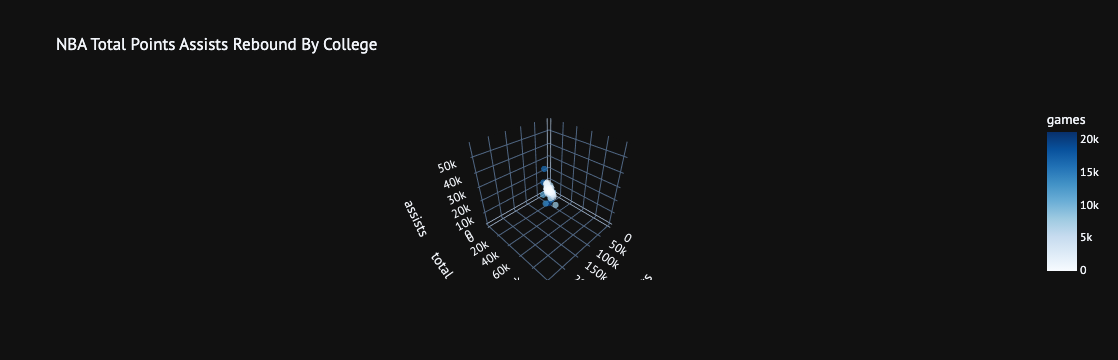

In [14]:
fig = px.scatter_3d(df2, x = "points", y = "total_rebounds", z = "assists", opacity = 0.75,
                    color = "games", color_continuous_scale = "Blues",
                    title = "NBA Total Points Assists Rebound By College",
                    hover_name="college")

fig.update_traces(marker = dict(size = 3.5)) # scaling down the markers
fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 12))
fig.show()

In [15]:
df8 = draft[draft["games"] > 82]
df9 = df8.groupby(["college"]).count()
df10 = df9[df9["id"] >= 5].copy() 
df10["more_than_5_NBA_player"] = 1 
df10 = df10.reset_index()
df11 = df10[["college", "more_than_5_NBA_player"]]
df12 = df11.merge(df8, left_on="college", right_on="college", suffixes=('_left', '_right'))
df13 = df12[df12["more_than_5_NBA_player"] == 1]
numeric_columns = df13.select_dtypes(include=['number'])
df14 = df13.groupby('college')[numeric_columns.columns].mean().reset_index()

## Breakdown for NBA Player's Total minutes played, Total games played, Total active years (By College)

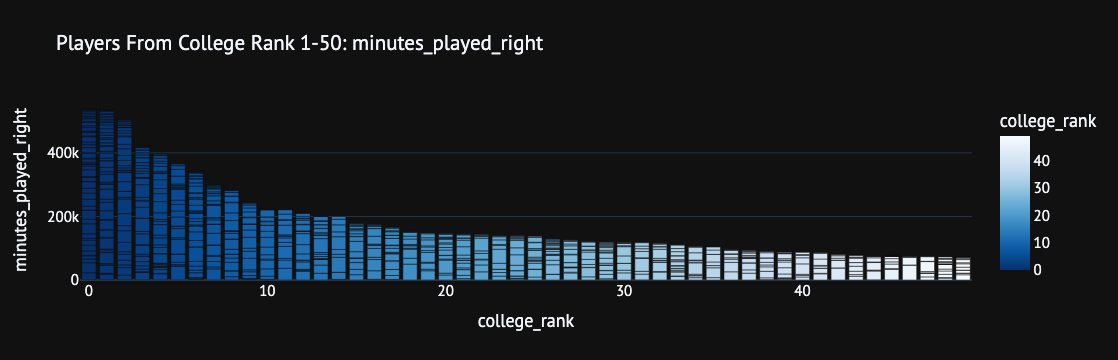

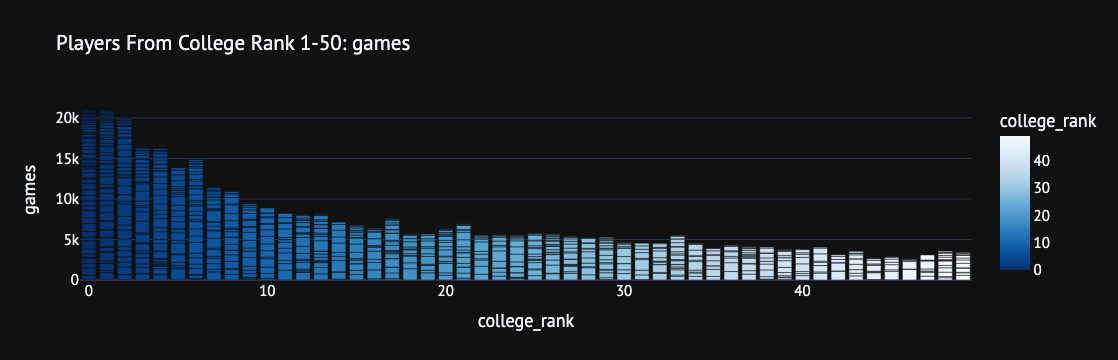

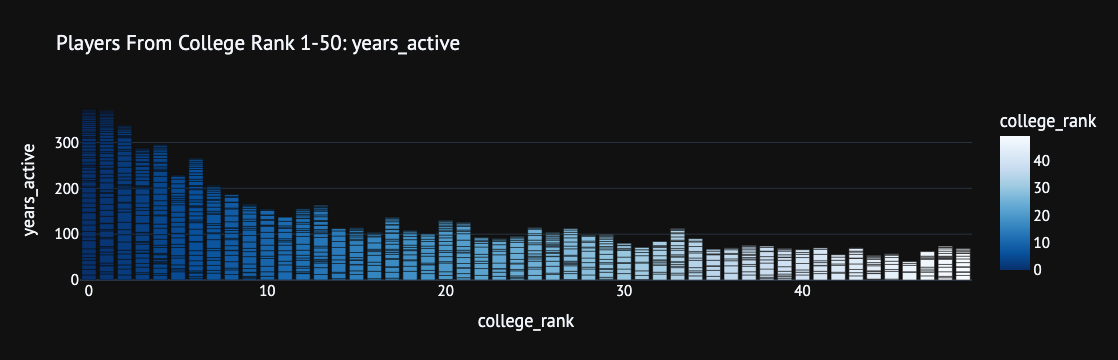

In [17]:

for y in ["minutes_played_right", "games", "years_active"]:

    fig = px.bar(df4[df4["college_rank"]<50], x = "college_rank", y = y, title = f"Players From College Rank 1-50: {y}",
    color = "college_rank", color_continuous_scale = "Blues_r",
                hover_data=['player'],
                hover_name="college")

    fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 15))
    fig.show()
    print("")

## Top 100 Scorers, Assister, Rebounders from college

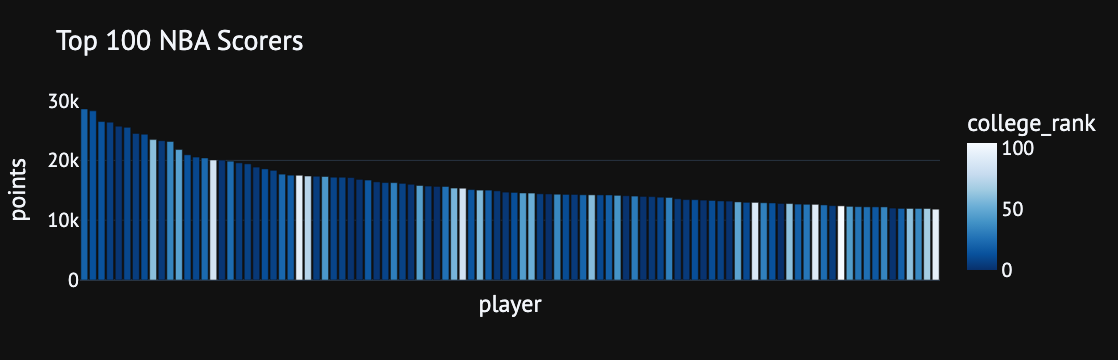

In [19]:
sorted_df = df4.sort_values(by = "points", ascending = False)

sorted_df = sorted_df.head(100)

fig = px.bar(sorted_df, x = "player", y = "points",
             title = "Top 100 NBA Scorers",
             color = "college_rank", color_continuous_scale = "Blues_r",
            hover_name="college")

fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 20))
fig.update_xaxes(showticklabels = False) # Hide x axis ticks
iplot(fig)

*Best Assisters*

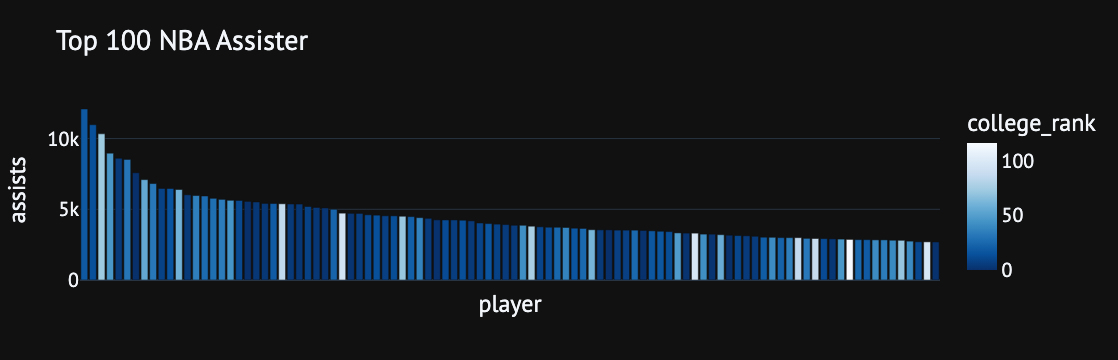

In [21]:
sorted_df = df4.sort_values(by = "assists", ascending = False)

sorted_df = sorted_df.head(100)

fig = px.bar(sorted_df, x = "player", y = "assists",
             title = "Top 100 NBA Assister",
             color = "college_rank", color_continuous_scale = "Blues_r",
            hover_name="college")

fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 20))
fig.update_xaxes(showticklabels = False) # Hide x axis ticks
iplot(fig)

*Best Rebounders*

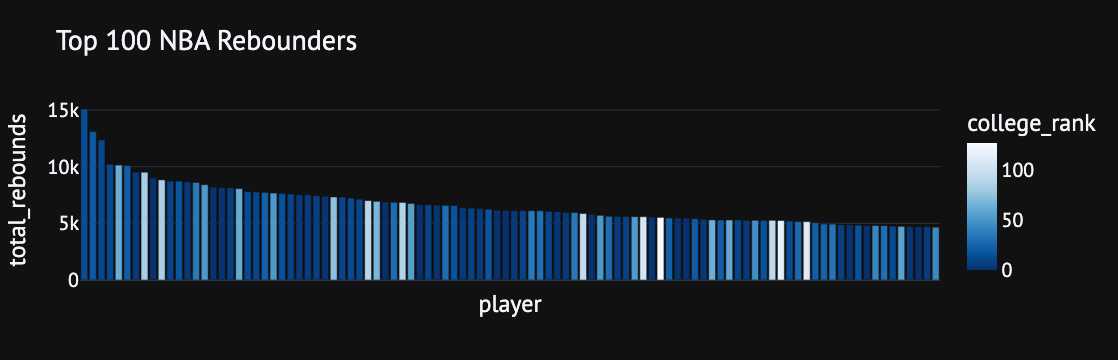

In [23]:
sorted_df = df4.sort_values(by = "total_rebounds", ascending = False)

sorted_df = sorted_df.head(100)

fig = px.bar(sorted_df, x = "player", y = "total_rebounds",
             title = "Top 100 NBA Rebounders",
             color = "college_rank", color_continuous_scale = "Blues_r",
            hover_name="college")

fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 20))
fig.update_xaxes(showticklabels = False) # Hide x axis ticks
iplot(fig)

# NBA Players' Average Stats Analysis (By College)

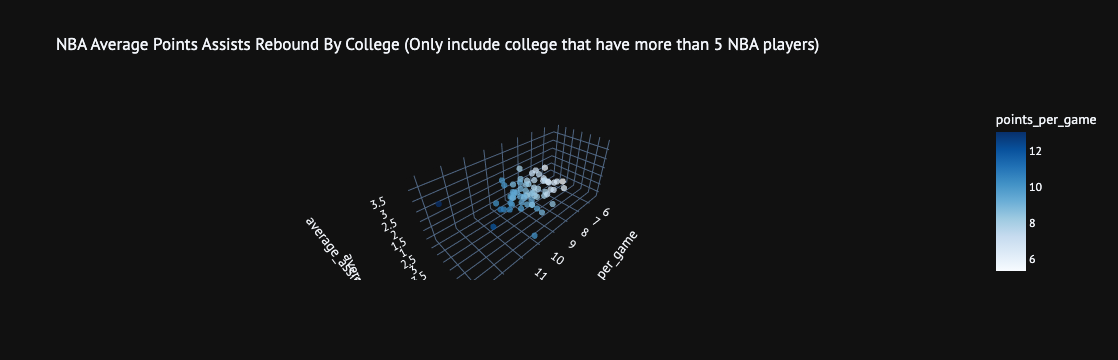

In [25]:
fig = px.scatter_3d(df14, x = "points_per_game", y = "average_total_rebounds", z = "average_assists", opacity = 0.75,
                    color = "points_per_game", color_continuous_scale = "Blues",
                    title = "NBA Average Points Assists Rebound By College (Only include college that have more than 5 NBA players)",
                    hover_name="college")

fig.update_traces(marker = dict(size = 3.5)) # scaling down the markers
fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 12))
fig.show()

## Players' Average 3 Pointer Percentage in NBA Analysis (By College)

In [27]:
# Filter draft by games and group by college, but only take numeric columns for mean
numeric_columns = draft.select_dtypes(include=['number'])
df5 = draft[draft["games"] > 82].groupby(["college"])[numeric_columns.columns].mean().sort_values(by=["minutes_played"], ascending=False)

# Select specific columns for the merged DataFrame
df6 = df5[["3_point_percentage", "free_throw_percentage"]].reset_index()

# Merge with df3 (assuming df3 contains 'college' column)
df7 = df3.merge(df6, left_on="college", right_on="college", suffixes=('_left', '_right'))


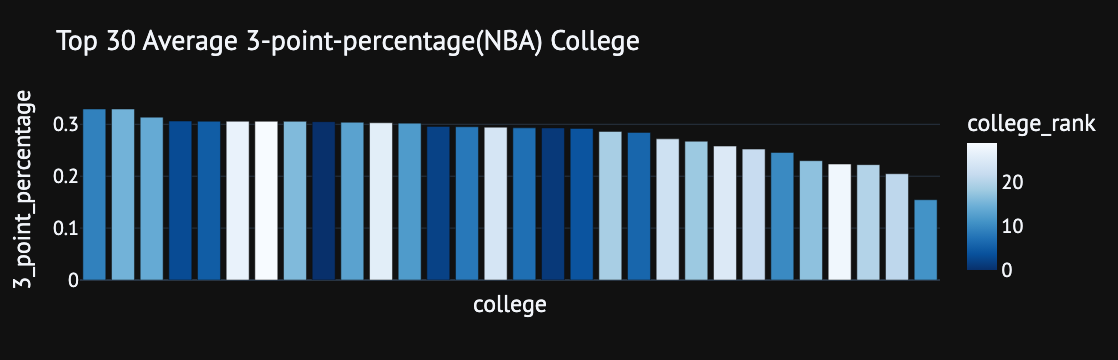

In [28]:
sorted_df = df7[df7["college_rank"]<30].sort_values(by = "3_point_percentage", ascending = False)

sorted_df = sorted_df.head(100)

fig = px.bar(sorted_df, x = "college", y = "3_point_percentage",
             title = "Top 30 Average 3-point-percentage(NBA) College",
             color = "college_rank", color_continuous_scale = "Blues_r",
            hover_name="college")

fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 20))
fig.update_xaxes(showticklabels = False) # Hide x axis ticks
fig.show()

By the result we got from the chart above, there is a interesting finding: In the Top 30 college players from Texas and Villanova have the best 3 point shooting apperance and players from Georgetown and Stanford have the worst 3 point shooting apperance.

Let's find out what representative players we can get form these college

## Texas (3PT 32.95%)

In [31]:

df8[df8["college"]=="Texas"].sort_values(by=["points"],ascending=False)

,id,year,rank,overall_pick,team,player,college,years_active,games,minutes_played,...,3_point_percentage,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement
1023,1024,2007,2,2,SEA,Kevin Durant,Texas,14.0,939.0,34509.0,...,0.384,0.884,36.8,27.2,7.1,4.3,155.2,0.216,6.8,76.4
963,964,2006,2,2,CHI,LaMarcus Aldridge,Texas,16.0,1076.0,36242.0,...,0.320,0.813,33.7,19.1,8.1,1.9,115.7,0.153,1.7,33.4
1090,1091,2008,9,9,CHA,D.J. Augustin,Texas,14.0,976.0,22851.0,...,0.381,0.867,23.4,9.5,1.8,3.9,47.7,0.100,-0.7,7.6
1220,1221,2010,19,19,BOS,Avery Bradley,Texas,12.0,660.0,18151.0,...,0.365,0.783,27.5,11.0,2.8,1.7,17.2,0.045,-2.4,-1.8
1265,1266,2011,4,4,CLE,Tristan Thompson,Texas,11.0,730.0,19556.0,...,0.263,0.605,26.8,9.0,8.4,1.0,47.6,0.117,-1.7,1.4
996,997,2006,35,35,TOR,P.J. Tucker,Texas,11.0,777.0,22529.0,...,0.364,0.748,29.0,7.1,5.6,1.5,40.0,0.085,-0.7,7.2
1512,1513,2015,11,11,IND,Myles Turner,Texas,7.0,431.0,12379.0,...,0.349,0.768,28.7,12.7,6.7,1.2,32.8,0.127,0.6,8.2
1290,1291,2011,29,29,SAS,Cory Joseph,Texas,11.0,728.0,16161.0,...,0.344,0.787,22.2,7.1,2.6,3.0,28.7,0.085,-1.1,3.9
792,793,2003,8,8,MIL,T.J. Ford,Texas,8.0,429.0,11882.0,...,0.289,0.815,27.7,11.2,3.1,5.8,16.9,0.068,-0.4,4.6
1643,1644,2017,22,22,BRK,Jarrett Allen,Texas,5.0,341.0,9062.0,...,0.189,0.699,26.6,11.6,8.7,1.4,34.9,0.185,1.7,8.5


In [32]:
# Filter the rows where the college is "Texas"
texas_data = df8[df8["college"] == "Texas"]

# Select only numeric columns and compute the mean
numeric_columns = texas_data.select_dtypes(include='number')
mean_values = numeric_columns.mean()

print(mean_values)

id                            1065.666667
year                          2007.333333
rank                            17.055556
overall_pick                    17.055556
years_active                     8.444444
games                          513.333333
minutes_played               13405.666667
points                        5996.111111
total_rebounds                2513.555556
assists                       1161.833333
field_goal_percentage            0.466722
3_point_percentage               0.329500
free_throw_percentage            0.747389
average_minutes_played          23.438889
points_per_game                  9.938889
average_total_rebounds           4.405556
average_assists                  1.955556
win_shares                      33.305556
win_shares_per_48_minutes        0.100167
box_plus_minus                  -0.577778
value_over_replacement           8.288889
dtype: float64


There are 18 NBA players from Texas play more than 82 games in their NBA career with 9.93 point-per-game, 4.40 rebounds-per-game, 1.95 assists-per-game

Average 3 points shooting percentage:32.95

Representative players are: Kevin Durant(SF), LaMarcus Aldridge(PF), D.J. Augustin(PG), Avery Bradley(PG), Tristan Thompson(PF)

![Texas.png](attachment:4b9d86be-6581-4314-ae08-0b65f59bed56.png)

## Villanova (3PT 32.94%)

In [35]:
#Villanova
df8[df8["college"]=="Villanova"].sort_values(by=["points"],ascending=False)

,id,year,rank,overall_pick,team,player,college,years_active,games,minutes_played,...,3_point_percentage,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement
985,986,2006,24,24,MEM,Kyle Lowry,Villanova,16.0,1023.0,32613.0,...,0.368,0.813,31.9,14.8,4.4,6.3,104.6,0.154,3.1,41.8
446,447,1997,7,7,NJN,Tim Thomas,Villanova,13.0,824.0,21336.0,...,0.369,0.758,25.9,11.5,4.1,1.5,35.2,0.079,-0.8,6.4
968,969,2006,7,7,BOS,Randy Foye,Villanova,11.0,752.0,19279.0,...,0.366,0.852,25.6,10.3,2.2,2.8,23.5,0.058,-1.2,3.8
389,390,1996,8,8,NJN,Kerry Kittles,Villanova,8.0,507.0,16929.0,...,0.378,0.780,33.4,14.1,3.9,2.6,44.8,0.127,2.2,18.0
37,38,1989,38,38,MIN,Doug West,Villanova,12.0,676.0,16649.0,...,0.191,0.801,24.6,9.6,2.5,1.9,17.7,0.051,-3.0,-4.2
486,487,1997,47,47,POR,Alvin Williams,Villanova,9.0,460.0,12610.0,...,0.313,0.760,27.4,9.0,2.5,4.1,21.7,0.082,-0.4,4.9
1174,1175,2009,33,33,POR,Dante Cunningham,Villanova,10.0,715.0,14875.0,...,0.345,0.649,20.8,5.8,3.7,0.7,24.9,0.080,-1.7,1.1
1691,1692,2018,10,10,PHI,Mikal Bridges,Villanova,4.0,309.0,9661.0,...,0.374,0.831,31.3,11.3,3.9,2.1,24.6,0.122,1.1,7.5
1714,1715,2018,33,33,DAL,Jalen Brunson,Villanova,4.0,277.0,6834.0,...,0.373,0.800,24.7,11.9,3.0,3.7,17.3,0.121,0.0,3.5
1651,1652,2017,30,30,UTA,Josh Hart,Villanova,5.0,296.0,8071.0,...,0.347,0.739,27.3,9.9,5.7,2.1,15.7,0.094,-0.3,3.4


In [36]:
# Filter the rows where the college is "Texas"
Villanova_data = df8[df8["college"] == "Villanova"]

# Select only numeric columns and compute the mean
numeric_columns = Villanova_data.select_dtypes(include='number')
mean_values = numeric_columns.mean()

print(mean_values)

id                            1174.625000
year                          2009.000000
rank                            24.937500
overall_pick                    24.937500
years_active                     6.937500
games                          419.312500
minutes_played               10992.000000
points                        4430.062500
total_rebounds                1503.437500
assists                       1151.000000
field_goal_percentage            0.444062
3_point_percentage               0.329437
free_throw_percentage            0.760250
average_minutes_played          24.075000
points_per_game                  9.631250
average_total_rebounds           3.581250
average_assists                  2.262500
win_shares                      22.262500
win_shares_per_48_minutes        0.084063
box_plus_minus                  -0.875000
value_over_replacement           5.550000
dtype: float64


There are 16 NBA players from Villanova play more than 82 games in their NBA career with 9.63 point-per-game, 3.58 rebounds-per-game, 2.26 assists-per-game

Average 3 points shooting percentage:32.94

Representative players are: Kyle Lowry(PG), Tim Thomas(PF), Randy Foye(SG/SF), Kerry Kittles(SG), Doug West(SG/SF)

![Villanova.png](attachment:c2b3b7a4-c9f8-4df0-9b22-a1731100e5a8.png)

## Georgetown (3PT 15.47%)

In [39]:
#Georgetown
df8[df8["college"]=="Georgetown"].sort_values(by=["points"],ascending=False)

,id,year,rank,overall_pick,team,player,college,years_active,games,minutes_played,...,3_point_percentage,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement
382,383,1996,1,1,PHI,Allen Iverson,Georgetown,14.0,914.0,37584.0,...,0.313,0.780,41.1,26.7,3.7,6.2,99.0,0.126,3.2,49.6
163,164,1992,2,2,CHH,Alonzo Mourning,Georgetown,15.0,838.0,25975.0,...,0.247,0.692,31.0,17.1,8.5,1.1,89.7,0.166,2.2,27.4
1026,1027,2007,5,5,BOS,Jeff Green,Georgetown,14.0,1051.0,30463.0,...,0.339,0.806,29.0,12.6,4.3,1.5,50.3,0.079,-1.4,4.8
111,112,1991,4,4,DEN,Dikembe Mutombo,Georgetown,18.0,1196.0,36791.0,...,0.000,0.684,30.8,9.8,10.3,1.0,117.0,0.153,1.7,33.9
1208,1209,2010,7,7,DET,Greg Monroe,Georgetown,10.0,646.0,17670.0,...,0.059,0.703,27.4,13.0,8.2,2.1,50.4,0.137,1.4,15.3
1098,1099,2008,17,17,TOR,Roy Hibbert,Georgetown,9.0,662.0,16389.0,...,0.250,0.755,24.8,10.0,6.3,1.3,35.9,0.105,-1.1,3.5
1384,1385,2013,3,3,WAS,Otto Porter Jr.,Georgetown,9.0,504.0,13080.0,...,0.398,0.794,26.0,10.6,5.1,1.5,36.0,0.132,1.8,12.5
411,412,1996,30,30,HOU,Othella Harrington,Georgetown,12.0,709.0,13924.0,...,0.000,0.738,19.6,7.4,4.4,0.6,23.1,0.080,-3.4,-4.9
407,408,1996,26,26,DET,Jerome Williams,Georgetown,9.0,587.0,12755.0,...,0.038,0.645,21.7,6.6,6.4,0.8,37.9,0.143,0.3,7.4
539,540,1998,43,43,WAS,Jahidi White,Georgetown,7.0,334.0,5913.0,...,0.000,0.534,17.7,5.9,5.8,0.2,10.4,0.085,-3.2,-1.8


In [40]:
# Filter the rows where the college is "Texas"
Georgetown_data = df8[df8["college"] == "Georgetown"]

# Select only numeric columns and compute the mean
numeric_columns = Georgetown_data.select_dtypes(include='number')
mean_values = numeric_columns.mean()

There are 13 NBA players from Georgetown play more than 82 games in their NBA career with 10.23 point-per-game, 5.49 rebounds-per-game, 1.35 assists-per-game

Average 3 points shooting percentage:15.47

Representative players are: Allen Iverson(PG/SG), Alonzo Mourning(C), Jeff Green(SF/PF), Dikembe Mutombo(C), Greg Monroe(C)

![Georgetown.png](attachment:3b66524c-3543-40a3-945f-da882adff177.png)

## Stanford (3PT 20.47%)

In [43]:
#Stanford
df8[df8["college"]=="Stanford"].sort_values(by=["points"],ascending=False)

,id,year,rank,overall_pick,team,player,college,years_active,games,minutes_played,...,3_point_percentage,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement
1091,1092,2008,10,10,NJN,Brook Lopez,Stanford,14.0,868.0,26192.0,...,0.341,0.796,30.2,16.4,6.2,1.4,71.5,0.131,1.3,21.7
1096,1097,2008,15,15,PHO,Robin Lopez,Stanford,14.0,939.0,20573.0,...,0.294,0.742,21.9,8.7,4.9,0.8,49.0,0.114,-1.1,4.7
455,456,1997,16,16,CLE,Brevin Knight,Stanford,12.0,729.0,18176.0,...,0.134,0.789,24.9,7.3,2.4,6.1,32.6,0.086,0.3,10.5
1486,1487,2014,45,45,CHH,Dwight Powell,Stanford,8.0,511.0,9720.0,...,0.296,0.751,19.0,7.7,4.6,1.0,38.0,0.188,1.3,8.0
848,849,2004,6,6,ATL,Josh Childress,Stanford,8.0,391.0,10432.0,...,0.329,0.779,26.7,9.1,4.7,1.6,25.7,0.118,0.8,7.4
171,172,1992,10,10,ATL,Adam Keefe,Stanford,9.0,617.0,10334.0,...,0.071,0.714,16.7,5.0,4.1,0.7,24.9,0.116,-1.3,1.7
688,689,2001,18,18,HOU,Jason Collins,Stanford,13.0,735.0,14974.0,...,0.206,0.647,20.4,3.6,3.7,0.9,20.1,0.064,-3.7,-6.5
722,723,2001,53,53,UTA,Jarron Collins,Stanford,10.0,542.0,8542.0,...,0.000,0.699,15.8,3.9,2.9,0.8,15.7,0.088,-3.1,-2.5
14,15,1989,15,15,DEN,Todd Lichti,Stanford,5.0,237.0,4240.0,...,0.244,0.789,17.9,7.9,2.1,1.4,5.6,0.063,-2.5,-0.5
1240,1241,2010,39,39,NYK,Landry Fields,Stanford,5.0,255.0,6010.0,...,0.332,0.666,23.6,6.8,4.3,1.6,10.5,0.084,-0.3,2.6


In [44]:
# Filter the rows where the college is "Texas"
Stanford_data = df8[df8["college"] == "Stanford"]

# Select only numeric columns and compute the mean
numeric_columns = Stanford_data.select_dtypes(include='number')
mean_values = numeric_columns.mean()

There are 13 NBA players from Stanford play more than 82 games in their NBA career with 6.68 point-per-game, 3.66 rebounds-per-game, 1.43 assists-per-game

Average 3 points shooting percentage:20.47

Representative players are: Brook Lopez(C), Robin Lopez(C), Dwight Powell(PF/C), Josh Childress(SF), Brevin Knight(PG)

![Stanford.png](attachment:e682f267-8c26-45f6-98d4-2fe78eec0f37.png)

## Players' Free-Throw Percentage in NBA Analysis (By College)

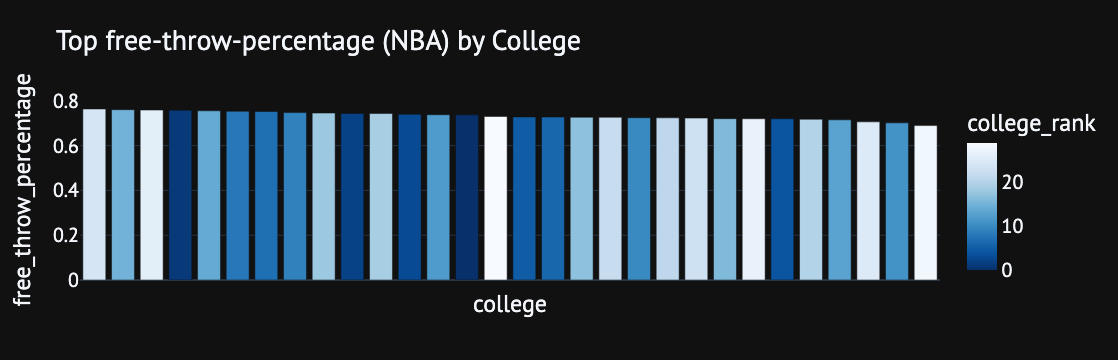

In [47]:
sorted_df = df7[df7["college_rank"]<30].sort_values(by = "free_throw_percentage", ascending = False)

sorted_df = sorted_df.head(100)

fig = px.bar(sorted_df, x = "college", y = "free_throw_percentage",
             title = "Top free-throw-percentage (NBA) by College",
             color = "college_rank", color_continuous_scale = "Blues_r",
            hover_name="college")

fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 20))
fig.update_xaxes(showticklabels = False) # Hide x axis ticks
fig.show()

In the top 30 college, USC has the best free throw percentage meanwhile Cincinnati has the worst free throw percentage

Let's find out what representative players we can get form these college

## USC (FT 76.33%)

In [50]:
#USC
df8[df8["college"]=="USC"].sort_values(by=["points"],ascending=False)

,id,year,rank,overall_pick,team,player,college,years_active,games,minutes_played,...,3_point_percentage,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement
1150,1151,2009,9,9,TOR,DeMar DeRozan,USC,13.0,957.0,32789.0,...,0.288,0.837,34.3,20.8,4.4,3.9,83.7,0.123,0.7,22.6
1277,1278,2011,16,16,PHI,Nikola Vučević,USC,11.0,741.0,22869.0,...,0.348,0.757,30.9,16.9,10.4,2.7,58.9,0.124,2.2,24.3
1037,1038,2007,16,16,WAS,Nick Young,USC,12.0,720.0,16419.0,...,0.376,0.836,22.8,11.4,2.0,1.0,18.6,0.054,-2.2,-0.8
1167,1168,2009,26,26,CHI,Taj Gibson,USC,13.0,896.0,21976.0,...,0.257,0.713,24.5,9.0,6.1,1.0,58.9,0.129,-0.7,7.1
1084,1085,2008,3,3,MIN,O.J. Mayo,USC,8.0,547.0,16919.0,...,0.373,0.820,30.9,13.8,3.1,2.9,21.8,0.062,-0.9,4.7
1727,1728,2018,46,46,HOU,De'Anthony Melton,USC,4.0,235.0,4853.0,...,0.361,0.766,20.7,8.4,3.6,2.8,7.7,0.076,0.5,3.1
1771,1772,2019,30,30,MIL,Kevin Porter Jr.,USC,3.0,137.0,3904.0,...,0.352,0.686,28.5,13.7,3.9,4.7,1.1,0.014,-2.7,-0.7
173,174,1992,12,12,MIA,Harold Miner,USC,4.0,200.0,3748.0,...,0.311,0.785,18.7,9.0,2.2,1.2,4.2,0.053,-3.0,-0.9
704,705,2001,35,35,NJN,Brian Scalabrine,USC,11.0,520.0,6772.0,...,0.344,0.783,13.0,3.1,2.0,0.8,7.6,0.054,-2.7,-1.2
1730,1731,2018,49,49,SAS,Chimezie Metu,USC,4.0,143.0,2017.0,...,0.308,0.762,14.1,6.1,3.6,0.8,2.1,0.050,-2.3,-0.2


In [51]:
# Filter the rows where the college is "Texas"
USC_data = df8[df8["college"] == "USC"]

# Select only numeric columns and compute the mean
numeric_columns = USC_data.select_dtypes(include='number')
mean_values = numeric_columns.mean()

There are 12 NBA players from USC play more than 82 games (length of a regular season) in their NBA career with 10.06 point-per-game, 3.88 rebounds-per-game, 2.04 assists-per-game

Average Free-Throw percentage:76.3

Representative players are: DeMar DeRozan(SG), Nikola Vučević(C), Nick Young(PG), Taj Gibson(PF/C), O.J. Mayo(PG)

![05fbf342055a761c4daa4472cd6940f.png](attachment:17a8f793-4fa0-42bf-8cb2-9cd02719437d.png)


## Cincinnati (FT 68.93%)

In [54]:
#Cincinnati
df8[df8["college"]=="Cincinnati"].sort_values(by=["points"],ascending=False)

,id,year,rank,overall_pick,team,player,college,years_active,games,minutes_played,...,3_point_percentage,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement
252,253,1993,37,37,LAL,Nick Van Exel,Cincinnati,13.0,880.0,28969.0,...,0.357,0.794,32.9,14.4,2.9,6.6,55.9,0.093,0.4,17.7
613,614,2000,1,1,NJN,Kenyon Martin,Cincinnati,15.0,757.0,23134.0,...,0.234,0.629,30.6,12.3,6.8,1.9,48.0,0.100,0.1,12.1
527,528,1998,31,31,LAL,Ruben Patterson,Cincinnati,10.0,649.0,15955.0,...,0.179,0.641,24.6,10.7,4.2,1.8,35.1,0.106,0.7,10.8
1241,1242,2010,40,40,IND,Lance Stephenson,Cincinnati,10.0,554.0,12680.0,...,0.314,0.694,22.9,8.6,4.1,2.9,17.5,0.066,-1.3,2.3
449,450,1997,10,10,MIL,Danny Fortson,Cincinnati,10.0,440.0,8832.0,...,0.167,0.785,20.1,8.2,7.2,0.7,22.3,0.121,-3.2,-2.6
927,928,2005,26,26,DET,Jason Maxiell,Cincinnati,10.0,618.0,11379.0,...,0.000,0.564,18.4,5.6,4.2,0.4,20.3,0.086,-2.5,-1.4
240,241,1993,25,25,CHI,Corie Blount,Cincinnati,11.0,644.0,9925.0,...,0.115,0.587,15.4,3.6,4.2,0.7,18.2,0.088,-2.5,-1.1
618,619,2000,6,6,ATL,DerMarr Johnson,Cincinnati,7.0,344.0,5930.0,...,0.336,0.789,17.2,6.2,2.2,0.9,6.4,0.052,-1.6,0.6
306,307,1994,37,37,SEA,Dontonio Wingfield,Cincinnati,4.0,114.0,1146.0,...,0.309,0.721,10.1,3.7,2.4,0.7,1.8,0.074,-2.6,-0.2


In [55]:
# Filter the rows where the college is "Texas"
Cincinnati_data = df8[df8["college"] == "Cincinnati"]

# Select only numeric columns and compute the mean
numeric_columns = Cincinnati_data.select_dtypes(include='number')
mean_values = numeric_columns.mean()

There are 9 NBA players from Cincinnati play more than 82 games (length of a regular season) in their NBA career with 8.14 point-per-game, 4,24 rebounds-per-game, 1.84 assists-per-game

Average Free-Throw percentage:68.9

Representative players are: Nick Van Exel(PG), Kenyon Martin(PF), Ruben Patterson(SF), Lance Stephenson(PF/C)

![04abea259b9797e369dde96c45dab90.png](attachment:e843d612-ec97-4e4e-902e-46a1f57fa7e4.png)

# NBA Survive Rate for players (By College)

Survive Rate Defination: The player paly more than 82 * 3 = 246 games is defined as survived

Here I selected the college which have 5 or more than 5 NBA players as data sourece

In [59]:
df15=df13[df13["games"]<246].groupby("college").count().reset_index()
df16=df15[["college","id"]]
df16.columns=["college","d_player"]

In [60]:
df17=df13[df13["games"]>=246].groupby("college").count().reset_index()
df18=df17[["college","id"]]
df18.columns=[["college","a_player"]]

In [61]:
df19=df17.merge(df16,left_on="college",right_on="college",suffixes=('_left', '_right'))
df19["Survive_Rate"]=df19["id"]/(df19["id"]+df19["d_player"])
df20=df19[["college","Survive_Rate"]]
df21=df20.sort_values(by=["Survive_Rate"],ascending=False)
df22=df21.merge(df3,left_on="college",right_on="college",suffixes=('_left', '_right'))

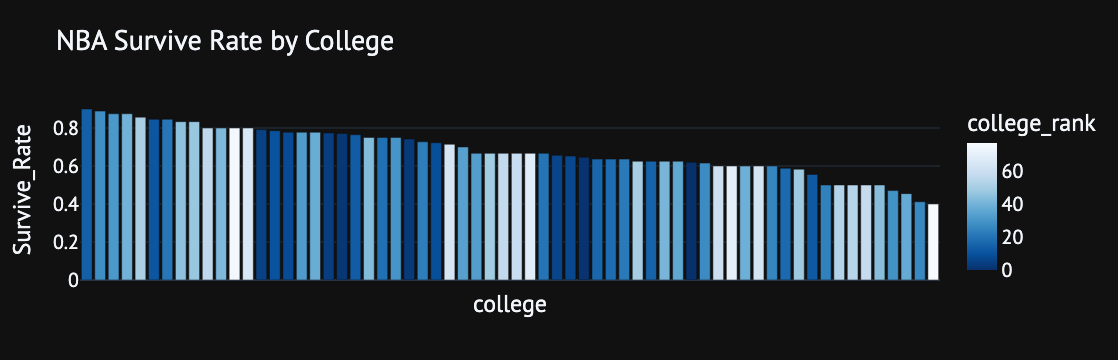

In [62]:
fig = px.bar(df22, x = "college", y = "Survive_Rate",
             title = "NBA Survive Rate by College",
             color = "college_rank", color_continuous_scale = "Blues_r",
            hover_name="college")

fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 20))
fig.update_xaxes(showticklabels = False) # Hide x axis ticks
fig.show()